# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of 150 samples of iris flowers, each belonging to one of three species: Iris setosa, Iris versicolor, and Iris virginica. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

##### Target Variable:
- **Species**: The species of the iris flower, which can take one of the following values:
  - 0: Iris setosa
  - 1: Iris versicolor
  - 2: Iris virginica

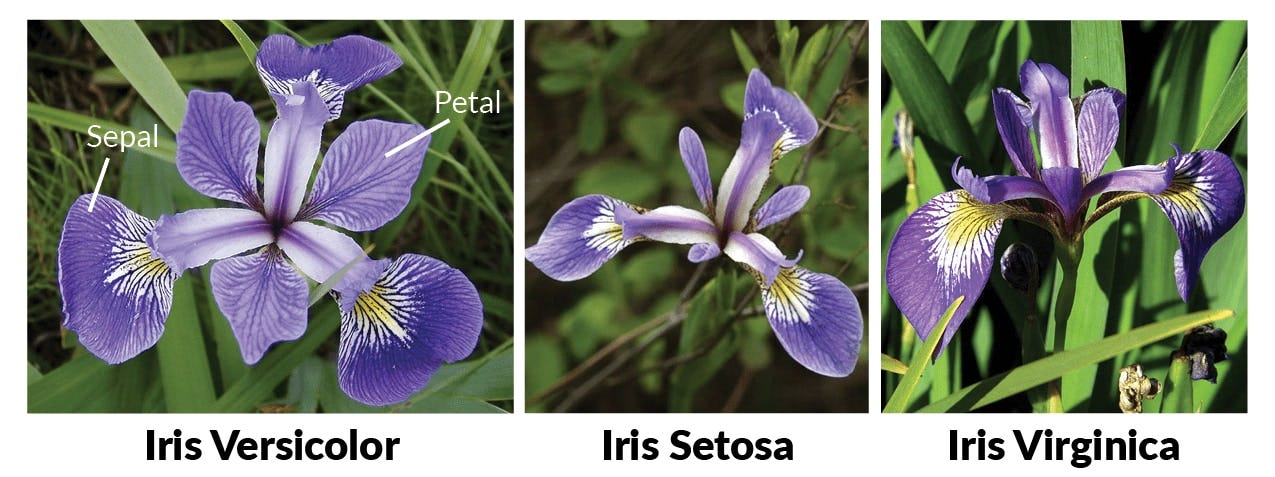

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [2]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Bind the disease progression (diabetes target) to the DataFrame
iris_df['species'] = iris_data.target


# Display the DataFrame
iris_df
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

In [3]:
iris_df.shape

(150, 5)

In [4]:

iris_df[0:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:

import seaborn as sns
iris_df.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.100000,3.500000,1.400000,0.200000,0
1,4.900000,3.000000,1.400000,0.200000,0
2,4.700000,3.200000,1.300000,0.200000,0
3,4.600000,3.100000,1.500000,0.200000,0
4,5.000000,3.600000,1.400000,0.200000,0


#### **Question 2:** 
#### Data-visualization

Create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


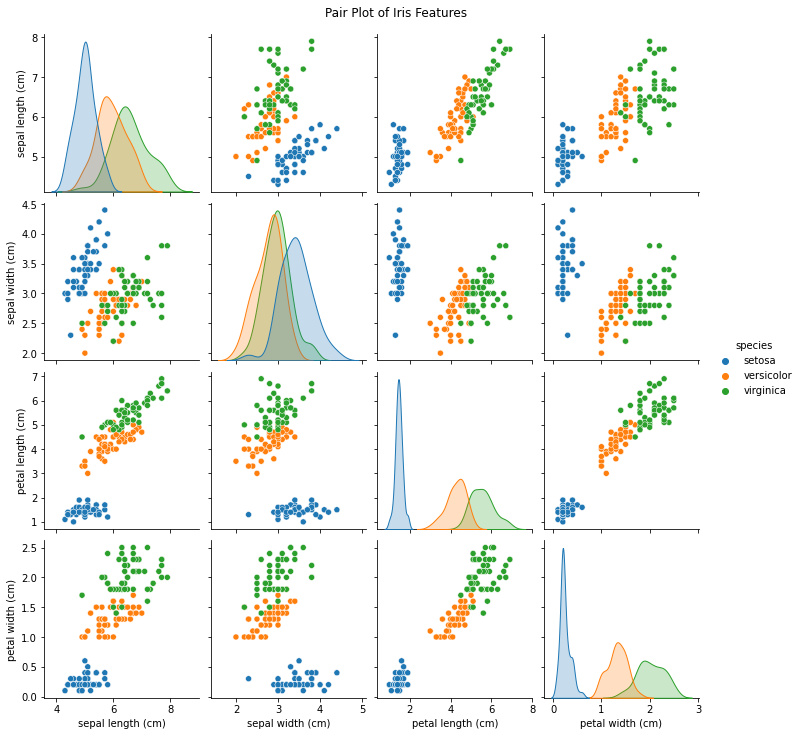

In [7]:


# Add the species
iris_df['species'] = iris_data.target

# Map species to their names (0 = setosa, 1 = versicolor, 2 = virginica)
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Create a pair plot to visualize relationships between the features
sns.pairplot(iris_df, hue="species", diag_kind='kde')
plt.suptitle('Pair Plot of Iris Features', y=1.02)

# Show the plot
plt.show()


#### **Question 3:** 
#### Data cleaning

In [8]:

scaler = StandardScaler()

scaled_features = scaler.fit_transform(iris_df.iloc[:, :-1])

# New DataFrame 
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

scaled_iris_df['species'] = iris_df['species'].values

# First few rows of  DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

Data standardization is an importaStandardizing the features of a dataset before applying clustering algorithms like K-Means is important for several reasons related to the algorithm's sensitivity to feature scaling. Here’s why standardization is crucial and the implications of using unstandardized data:

Sensitivity to Feature Magnitudes:
K-Means clustering uses Euclidean distance to assign data points to clusters. The distance between data points is heavily influenced by the magnitude of the features. If one feature has a much larger range or scale than others, it will dominate the distance calculation and affect the clustering results.

For example:

Suppose we have a dataset with two features: height in meters (ranges from 1 to 2 meters) and income in thousands of dollars (ranges from 20 to 100). The differences in the income feature (ranging from 20,000 to 100,000) are much larger than those in the height feature (ranging from 1 to 2). As a result, the clustering algorithm will focus more on the income feature and largely ignore the height feature, leading to biased clusters.

Equal Weighting of Features:

Standardization ensures that each feature contributes equally to the distance calculation. When all features are standardized, they are on the same scale, meaning that no single feature has more influence than others based solely on its range. Standardization typically involves:

Subtracting the mean from each feature, so it has a mean of 0.
Dividing by the standard deviation, so that each feature has a standard deviation of 1.
By scaling features to the same range,  allow the algorithm to assign clusters based on patterns in the data rather than the feature's original scale.nt technique that is mostly performed as a pre-processing step before inputting data into many machine learning models, to standardize the range of features of an input data set.


#### **Question 4:** 
#### K-means clustering 
Apply the K-Means clustering algorithm to the Iris dataset.
Choose the number of clusters (K=3, since there are three species) and fit the model.
Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [10]:
# K-Means clustering

kmeans = KMeans(n_clusters=3, random_state=42)  
# Fit the model 

iris_df['cluster'] = kmeans.fit_predict(iris_df)  

print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


 Discuss the results of the K-Means clustering. How well did the clusters match the true species?

After applying the K-Means clustering algorithm, each sample in the Iris dataset is assigned to one of the three clusters. The original dataset contains three species of iris flowers:
Iris Setosa
Iris Versicolor
Iris Virginica
Comparison of Clusters to Actual Species
To evaluate how well the clusters match the true species, we can create a cross-tabulation (confusion matrix) to compare the cluster assignments with the actual species labels. Here's a Python code snippet to create this comparison
The confusion matrix will show how many samples of each species were assigned to each cluster:
Rows represent the actual species.
Columns represent the assigned clusters.
Discussion of Results
Cluster Quality: If the K-Means algorithm performed well, we should see clear groupings in the confusion matrix where most of the samples from each species fall into a specific cluster.
Cluster Misclassification: Look for any misclassifications. For instance, if many "versicolor" samples are grouped with "virginica," this may indicate overlap in the feature space.
Interpretation:
If all clusters correspond perfectly to the species, we have high clustering effectiveness.
If there are significant overlaps, it suggests that the features used in K-Means might not adequately distinguish between the species, or that the species are inherently similar in those dimensions.

#### **Question 5:** 
#### Bootstrapping 

 Implement bootstrapping on the mean of one of the sepal or petal measurement variables (e.g., Sepal Length, Petal Width) to assess the stability of the mean estimate. Generate 1000 bootstrap samples, calculate the mean for each sample, and compute a 95% confidence interval to evaluate the variability in the estimate.

Mean of the original data: 5.843333333333334
Bootstrap mean: 5.844700666666666
95% Confidence Interval: [5.710633333333334, 5.972683333333333]


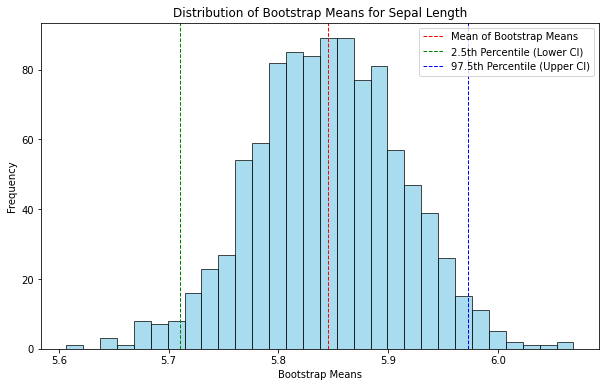

In [11]:

iris_data = sns.load_dataset('iris')

variable = 'sepal_length'
data = iris_data[variable].values

n_bootstrap_samples = 1000

bootstrap_means = np.zeros(n_bootstrap_samples)

np.random.seed(42) 
for i in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
mean_of_means = np.mean(bootstrap_means)

print(f"Mean of the original data: {np.mean(data)}")
print(f"Bootstrap mean: {mean_of_means}")
print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")

# Optional: Plotting the distribution of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_of_means, color='red', linestyle='dashed', linewidth=1, label='Mean of Bootstrap Means')
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=1, label='2.5th Percentile (Lower CI)')
plt.axvline(upper_bound, color='blue', linestyle='dashed', linewidth=1, label='97.5th Percentile (Upper CI)')
plt.title('Distribution of Bootstrap Means for Sepal Length')
plt.xlabel('Bootstrap Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the selected variable appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

Bootstrapping  allows us to assess the variability of an estimate—such as the mean—by repeatedly sampling from the data.

The mean calculated from the original dataset provides a point estimate of the average sepal length.
Bootstrap Means:

The distribution of the bootstrap means reveals how much the mean estimate fluctuates when we sample from the data repeatedly. If the bootstrap means are tightly clustered around the mean of the original data, it suggests that our estimate is stable. Conversely, a wide spread indicates greater variability and potential uncertainty.
Confidence Interval:

The 95% confidence interval derived from the bootstrapped means offers critical insight into the reliability of the mean estimate.
If the confidence interval is narrow, it suggests that the mean is a stable estimate, indicating that we can be fairly confident that the true mean of the population lies within this interval.
A wider confidence interval would imply greater uncertainty about the population mean, suggesting that the mean estimate from the original dataset may not be as reliable.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
